In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
# format

# dimensions (A4:  8.27 x 11.69 inches)
text_frac = 0.8
abs_pw = 8.27 # pagewidth
abs_pl = 11.69 # pagelength
pw = text_frac * abs_pw
pl = text_frac * abs_pl

# others
dpi=600

# colors
c1 = 'tab:blue'
c2 = 'tab:red'

# Figure 0

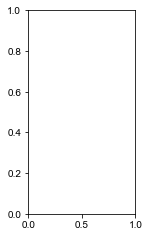

In [3]:
fig = plt.figure(constrained_layout=False, figsize=(pw/4,0.4*pl))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                        wspace=0.05)
ax1 = fig.add_subplot(gs[0,0])
ax1_ratio = 2

In [4]:
# fig0 parameters
## light and neuron display
cortex_boundaries = { 
    'x': [0,1000],
    'z': [0,2000]
}
cortical_layer_boundaries = [400,800,1200,1600] # L1-2/3, L2/3-4, L4-5, L5-6 (#ToDO: find out real boundaries)
L1_x = 500
N1_x = 500

scaling_neurons = 0.6
neuron_color = c1

# light source parameter combinations: (NA,diam) 0.1,50;  0.22,50;  0.22,200;  0.39,200;  0.39,400
parameters = dict(
    lightsource1 = dict(
        NA = 0.1,
        d__um = 50),
    mu_s__per_mm = 7.37,
    mu_a__per_mm = 0.1249,
)

# light profiles
# Foutz optical fiber light source
from neurostim.light_propagation_models import foutz_et_al2012
xx, zz = np.meshgrid(np.arange(cortex_boundaries['x'][0],cortex_boundaries['x'][1]),
                     np.arange(cortex_boundaries['z'][0],cortex_boundaries['z'][1]))
L1_prof = foutz_et_al2012(
    x=xx-L1_x, y=np.zeros(np.shape(xx)), z=zz, power=1, 
    width=parameters['lightsource1']['d__um'], NA=parameters['lightsource1']['NA'], 
    scatter_coefficient=parameters['mu_s__per_mm'], absorbance_coefficient=parameters['mu_a__per_mm'],
    spreading=True, scattering=True)
# for LogNorm set all 0 to 1e-10
L1_prof[L1_prof==0] = 1e-10
# scale bar
#L1_prof[500:550,300:400]=1e10
#L1_prof[300:500,750:800]=1e10
# normalize light_profile by average output intensity
# 1W/cm2 light power / (pi * diam_in_cm/2)**2
avrg_output_intensity = 1 / (np.pi * (parameters['lightsource1']['d__um']/2 * 1e-4)**2)
L1_prof /= avrg_output_intensity
# neuron morphologies
# cd to base directory of this repository to enable the loading of NEURON simulations
import os
os.chdir('/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim')
from neurostim.cell import Cell
L5 = Cell('simneurostim/model/hoc/L5.hoc', cortical_depth=dict(L5=1170))
collectionL5 = L5.plot_foutz2012(
    func=lambda x:1, axes='xz',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=c1, shift_x=N1_x)
L23 = Cell('simneurostim/model/hoc/L23.hoc', cortical_depth=None)
collectionL23 = L23.plot_foutz2012(
    func=lambda x:1, axes='xz',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=c2, shift_x=N1_x)
ax1.add_collection(collectionL5)
ax1.add_collection(collectionL23)

	1 
	1 
	1 
	1 
----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0
	0 
	1 
	1 
	1 
	1 
	1 
	1 


/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:617: RuntimeWarning: invalid value encountered in true_divide
  a = (data - clim[0])/(clim[1]-clim[0])


----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


In [5]:
from matplotlib.colors import LogNorm, BoundaryNorm
from matplotlib.cm import Greys_r as cmap
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = truncate_colormap(cmap, minval=0, maxval=0.6)
bounds = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
norm = BoundaryNorm(bounds,ncolors=cmap.N)
mappable = ax1.pcolormesh(xx,zz*-1,L1_prof, shading='nearest',
              norm=norm,
              cmap=cmap)
ax1.set_xlim(*cortex_boundaries['x']) 
ax1.set_ylim(
    -1*(cortex_boundaries['x'][1]-cortex_boundaries['x'][0])*ax1_ratio,
    0
)
# turn axes off for neuron and light display
ax1.set_axis_off()

In [6]:
fig.savefig('paper/NEW_FIGURES/FIG6/plots/neuron_display_'+ str(parameters['lightsource1']['d__um'])\
            +'_'+ str(parameters['lightsource1']['NA'])+'.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')

In [7]:
### sanity check if optical fiber actually has given diameter
# based on assumption that ~95% of the light power comes out of the surface area of the optical fiber
def find_nearest(array, v):
    return array[np.argmin(np.abs(array-v))]
cumsum = np.cumsum(L1_prof[0,:])
x1 = np.arange(1000)[cumsum==find_nearest(cumsum, v=np.max(cumsum)*0.025)]
x2 = np.arange(1000)[cumsum==find_nearest(cumsum, v=np.max(cumsum)*0.975)]
# plt.plot(cumsum)
# plt.axvline(x=x1)
# plt.axvline(x=x2)
print('estimated diameter: ',x2-x1, 'um')

estimated diameter:  [49] um


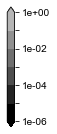

In [8]:
# colorbar light
fig = plt.figure(constrained_layout=False, figsize=(pw/50,pw/3))
ax = fig.add_subplot()                           
ticks=bounds
cbar = fig.colorbar(mappable, cax=ax, ticks=ticks, extend='both')
tick_labels = ['{:5.0e}'.format(x) if idx%2==0 else '' for idx,x in enumerate(ticks)]  # unit: mW/cm2
cbar.ax.set_yticklabels(tick_labels, rotation=0)
fig.savefig('paper/NEW_FIGURES/FIG6/plots/colobar_light_intensity.png', dpi=dpi, 
            facecolor='w', edgecolor='w',  
            bbox_inches='tight')
plt.show()